In [80]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
psz = pd.read_csv('data/psz2.txt', sep='|', header=9, skiprows=[10], on_bad_lines='warn', skipfooter=1)
psz = psz.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_24261/1843992578.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  psz = pd.read_csv('data/psz2.txt', sep='|', header=9, skiprows=[10], on_bad_lines='warn', skipfooter=1)


In [62]:
psz

,ndex,Name,GLON GLAT,RAdeg DEdeg,e_pos,SNR,e,Det,2,PSZ,...,E_MSZ,e_MSZ,MCXC,RedMAPPer,ACT,SPT,ISE,AMIevi,O,Comment
0,1,PSZ2 G000.04+45.13,0.0405432 45.1351750,229.1905120 -1.0172220,4.107310,6.75319,2,111,0,1,...,0.393290,0.370242,J1516.5-0056,RMJ151653.9-010506.3,,,-10,-1000.0,1,NaN
1,2,PSZ2 G000.13+78.04,0.1380577 78.0421138,203.5586828 20.2559905,2.056201,9.25669,2,111,1,1227,...,0.351061,0.322839,J1334.1+2013,RMJ133408.7+201453.0,,,-10,-100.0,1,"Point sources at: 353GHz,"
2,3,PSZ2 G000.40-41.86,0.4029953 -41.8607926,316.0844846 -41.3541688,2.427383,9.70428,1,111,0,2,...,0.320350,0.344108,J2104.3-4120,,,,-10,-1000.0,1,NaN
3,4,PSZ2 G000.77-35.69,0.7750496 -35.6993864,307.9728437 -40.5987254,2.343365,6.58179,2,111,0,3,...,0.589880,0.611330,J2031.8-4037,,,SPT-CLJ2031-4037,2,-1000.0,1,NaN
4,5,PSZ2 G002.04-22.15,2.0457985 -22.1521656,291.3596104 -36.5179436,5.020757,5.12563,3,1,0,-1,...,0.000000,0.000000,,,,,-3,-1000.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,1649,PSZ2 G358.94-70.57,358.9416971 -70.5710282,352.7803063 -36.5498066,3.157562,6.05340,3,111,0,-1,...,0.246912,0.250808,J2331.2-3630,,,,-10,-1000.0,1,NaN
1649,1650,PSZ2 G358.98-67.26,358.9881348 -67.2634477,348.9265574 -37.7791038,1.724289,9.88427,3,111,1,1224,...,0.317408,0.302077,J2315.7-3746,,,,-10,-1000.0,1,"Point sources at: 353GHz,"
1650,1651,PSZ2 G359.07-32.12,359.0706554 -32.1293023,303.0188998 -41.4868824,2.428800,7.64275,1,111,0,1225,...,0.392048,0.389491,J2012.0-4129,,,SPT-CLJ2012-4130,-10,-1000.0,1,NaN
1651,1652,PSZ2 G359.60-08.72,359.6093823 -8.7205682,275.0918356 -33.5317168,2.428045,4.74027,1,110,0,-1,...,0.000000,0.000000,,,,,0,-1000.0,0,NaN


In [63]:
psz.columns=psz.columns.str.strip()
psz.columns.tolist()

['ndex',
 'Name',
 'GLON        GLAT',
 'RAdeg       DEdeg',
 'e_pos',
 'SNR',
 'e',
 'Det',
 '2',
 'PSZ',
 'R',
 'q_neural',
 'Y5R500',
 'e_Y5R500',
 'Val',
 'zID',
 'z',
 'MSZ',
 'E_MSZ',
 'e_MSZ',
 'MCXC',
 'RedMAPPer',
 'ACT',
 'SPT',
 'ISE',
 'AMIevi',
 'O',
 'Comment']

In [66]:
(psz['MCXC'].notna() & (psz['MCXC'] != '')).sum()

551

In [38]:
mcxc=pd.read_csv('data/mcxc|.txt', header=3, sep='|', skiprows=[4],on_bad_lines='warn', skipfooter=1).rename(columns=lambda x: x.strip())

/var/folders/99/vfh56jrs1nqcj8zqtcs5fkv40000gn/T/ipykernel_24261/3568860887.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  mcxc=pd.read_csv('data/mcxc|.txt', header=3, sep='|', skiprows=[4],on_bad_lines='warn', skipfooter=1).rename(columns=lambda x: x.strip())


In [48]:
mcxc = mcxc.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
mcxc

,MCXC,OName,AName,Ah Am RAs Ed Em Es,RAdeg DEdeg,GLON GLAT,z,Cat,Sub-Cat,Scale,...,R500,Notes,Cat1,Cat2,Cat3,Cat4,500r1,500r2,500r3,500r4
0,J0000.1+0816,RXC J0000.1+0816,UGC 12890,0 0 7.1 + 8 16 28,0.030 8.274,101.783 -52.477,0.0396,NORAS/REFLEX,NORAS,0.784,...,0.6296,,BCS,,,,1.084,,,NaN
1,J0000.4-0237,RXC J0000.4-0237,,0 0 24.7 - 2 37 30,0.103 -2.625,94.268 -62.622,0.0379,SGP,SGP,0.752,...,0.4817,,,,,,,,,NaN
2,J0001.6-1540,RXC J0001.6-1540,,0 1 39.0 -15 40 52,0.412 -15.681,75.129 -73.733,0.1246,SGP,SGP,2.234,...,0.8021,,,,,,,,,NaN
3,J0001.9+1204,RXC J0001.9+1204,A2692,0 1 57.0 +12 4 23,0.488 12.073,104.308 -49.001,0.2033,NORAS/REFLEX,NORAS,3.342,...,0.9178,,,,,,,,,NaN
4,J0003.1-0605,RXCJ0003.1-0605,A2697,0 3 11.8 - 6 5 10,0.799 -6.086,92.169 -66.033,0.2320,NORAS/REFLEX,REFLEX,3.698,...,1.1326,,SGP,,,,0.952,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1738,J2357.0-3445,RXCJ2357.0-3445,A4059,23 57 2.3 -34 45 38,359.260 -34.761,356.359 -76.082,0.0475,NORAS/REFLEX,REFLEX,0.931,...,0.9640,L,EMSS_1994,SGP,,,0.132,0.952,,NaN
1739,J2359.3-6042,RXCJ2359.3-6042,A4067,23 59 19.2 -60 42 0,359.830 -60.700,314.102 -55.284,0.0989,NORAS/REFLEX,REFLEX,1.826,...,0.8572,,,,,,,,,NaN
1740,J2359.4-3418,MS2356.9-3434,,23 59 27.3 -34 18 22,359.864 -34.306,357.005 -76.739,0.1150,EMSS,EMSS_1994,2.085,...,0.6198,,,,,,,,,NaN
1741,J2359.5-3211,RX J2359.5-3211,BSe RXJ2359.5-3211,23 59 36.0 -32 11 6,359.900 -32.185,5.630 -77.667,0.4780,SHARC,SHARC_SOUTH,5.957,...,0.6776,,,,,,,,,NaN


In [42]:
mcxc.columns.tolist()

['MCXC',
 'OName',
 'AName',
 'Ah Am  RAs  Ed Em Es',
 'RAdeg   DEdeg',
 'GLON    GLAT',
 'z',
 'Cat',
 'Sub-Cat',
 'Scale',
 'L500',
 'M500',
 'R500',
 'Notes',
 'Cat1',
 'Cat2',
 'Cat3',
 'Cat4',
 '500r1',
 '500r2',
 '500r3',
 '500r4']

In [69]:
print(mcxc['MCXC'].dtype)
print(psz['MCXC'].dtype)

object
object


In [68]:
combo = pd.merge(mcxc, psz, on="MCXC", how="inner")
combo

,MCXC,OName,AName,Ah Am RAs Ed Em Es,RAdeg DEdeg,GLON GLAT,z_x,Cat,Sub-Cat,Scale,...,MSZ,E_MSZ,e_MSZ,RedMAPPer,ACT,SPT,ISE,AMIevi,O,Comment
0,J0001.9+1204,RXC J0001.9+1204,A2692,0 1 57.0 +12 4 23,0.488 12.073,104.308 -49.001,0.2033,NORAS/REFLEX,NORAS,3.342,...,4.107262,0.447796,0.505267,RMJ000158.5+120358.0,,,-10,-1000.0,0,NaN
1,J0003.1-0605,RXCJ0003.1-0605,A2697,0 3 11.8 - 6 5 10,0.799 -6.086,92.169 -66.033,0.2320,NORAS/REFLEX,REFLEX,3.698,...,5.957353,0.368165,0.369144,RMJ000311.6-060530.1,,,-10,-1000.0,1,NaN
2,J0003.8+0203,RXCJ0003.8+0203,A2700,0 3 50.6 + 2 3 48,0.961 2.063,99.610 -58.637,0.0924,NORAS/REFLEX,REFLEX,1.719,...,2.238774,0.282160,0.301448,RMJ000349.7+020359.3,,,-10,-1000.0,0,NaN
3,J0006.0-3443,RXCJ0006.0-3443,A2721,0 6 3.0 -34 43 27,1.513 -34.724,352.147 -77.668,0.1147,NORAS/REFLEX,REFLEX,2.080,...,4.001657,0.248869,0.226974,,,,-10,-1000.0,1,NaN
4,J0006.3+1052,RXC J0006.3+1052,ZwCl15,0 6 21.7 +10 52 4,1.591 10.868,105.386 -50.462,0.1698,NORAS/REFLEX,NORAS,2.895,...,3.853959,0.405330,0.437557,RMJ000620.3+105151.5,,,-10,-1000.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,J2351.6-2605,RXCJ2351.6-2605,A2667,23 51 40.7 -26 5 1,357.919 -26.084,34.017 -76.609,0.2264,NORAS/REFLEX,REFLEX,3.631,...,7.557539,0.365168,0.382711,,,,-10,-1000.0,1,NaN
547,J2354.2-1024,RXCJ2354.2-1024,A2670,23 54 13.4 -10 24 46,358.556 -10.413,81.334 -68.530,0.0765,NORAS/REFLEX,REFLEX,1.450,...,2.761984,0.216913,0.225417,RMJ235413.7-102508.5,,,-10,-1000.0,1,NaN
548,J2355.6+1120,RXC J2355.6+1120,A2675,23 55 38.3 +11 20 36,358.909 11.343,101.718 -49.216,0.0726,NORAS/REFLEX,NORAS,1.382,...,2.399462,0.251411,0.234284,RMJ235542.6+112035.6,,,-10,-1000.0,1,NaN
549,J2357.0-3445,RXCJ2357.0-3445,A4059,23 57 2.3 -34 45 38,359.260 -34.761,356.359 -76.082,0.0475,NORAS/REFLEX,REFLEX,0.931,...,2.468719,0.163126,0.149009,,,,-10,-1000.0,1,NaN


In [72]:
combo['Sub-Cat'].value_counts()

Sub-Cat
REFLEX         225
NORAS          191
CIZAI           35
BCS             22
CIZAII          18
SGP             14
MACS_BRIGHT     13
eBCS             9
MACS_MJFV        8
400SD_SER        7
MACS_DIST        5
EMSS_1994        2
EMSS_2004        1
NEP              1
Name: count, dtype: int64

In [73]:
combo.to_pickle('data/mcxc_psz_combined.pkl')

In [74]:
combo.columns.tolist()

['MCXC',
 'OName',
 'AName',
 'Ah Am  RAs  Ed Em Es',
 'RAdeg   DEdeg',
 'GLON    GLAT',
 'z_x',
 'Cat',
 'Sub-Cat',
 'Scale',
 'L500',
 'M500',
 'R500',
 'Notes',
 'Cat1',
 'Cat2',
 'Cat3',
 'Cat4',
 '500r1',
 '500r2',
 '500r3',
 '500r4',
 'ndex',
 'Name',
 'GLON        GLAT',
 'RAdeg       DEdeg',
 'e_pos',
 'SNR',
 'e',
 'Det',
 '2',
 'PSZ',
 'R',
 'q_neural',
 'Y5R500',
 'e_Y5R500',
 'Val',
 'zID',
 'z_y',
 'MSZ',
 'E_MSZ',
 'e_MSZ',
 'RedMAPPer',
 'ACT',
 'SPT',
 'ISE',
 'AMIevi',
 'O',
 'Comment']

Text(0, 0.5, 'M500 from L-M (10^14 Msun)')

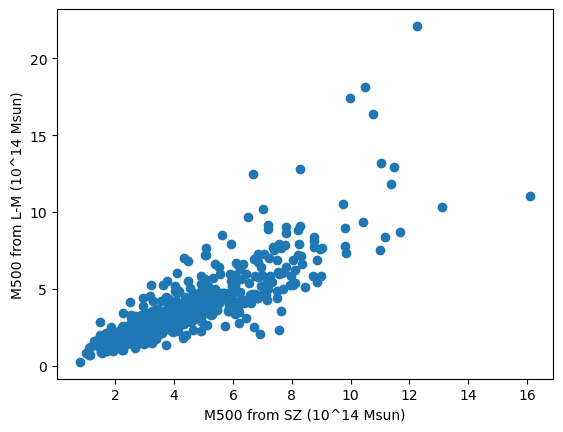

In [77]:
plt.scatter(combo['MSZ'], combo['M500'])
plt.xlabel('M500 from SZ (10^14 Msun)')
plt.ylabel('M500 from L-M (10^14 Msun)')


Text(0.5, 1.0, 'Mass comparison')

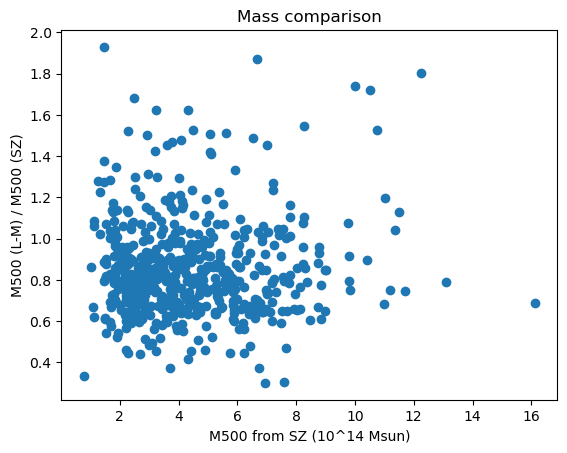

In [83]:
plt.scatter(combo['MSZ'], combo['M500']/combo['MSZ'])
plt.xlabel('M500 from SZ (10^14 Msun)')
plt.ylabel('M500 (L-M) / M500 (SZ)')
plt.title("Mass comparison")

In [81]:
np.min(combo['M500']/combo['MSZ']), np.median(combo['M500']/combo['MSZ']), np.max(combo['M500']/combo['MSZ'])

(0.29996725557091836, 0.813863148499348, 1.9299347833509746)

Text(0.5, 0, 'M500(Xray)/M500(SZ)')

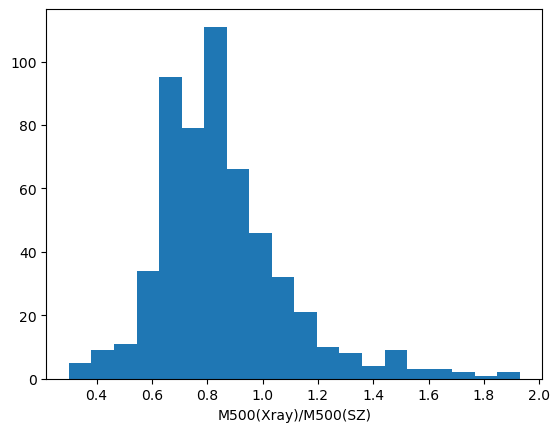

In [88]:
plt.hist(combo['M500']/combo['MSZ'], bins = 20)
plt.xlabel('M500(Xray)/M500(SZ)')


Text(0, 0.5, 'z from PSZ')

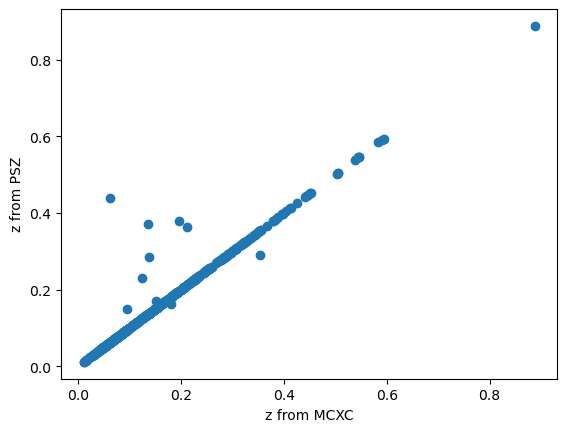

In [91]:
plt.scatter(combo['z_x'], combo['z_y'])
plt.xlabel('z from MCXC')
plt.ylabel('z from PSZ')

Text(0.5, 1.0, 'redshifts of REFLEX and NORAS clusters')

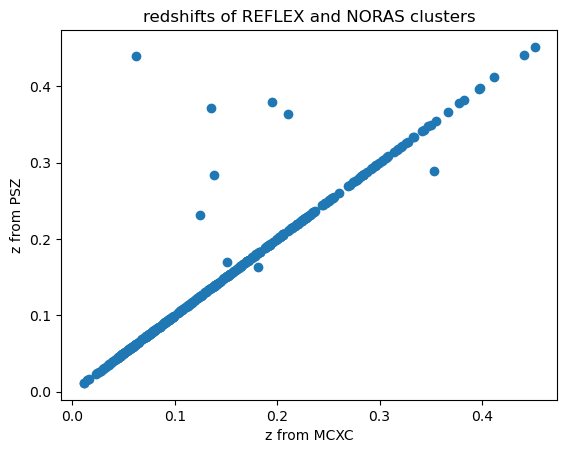

In [97]:
combo_subset = combo[combo['Sub-Cat'].isin(['REFLEX', 'NORAS'])]
plt.scatter(combo_subset['z_x'], combo_subset['z_y'])
plt.xlabel('z from MCXC')
plt.ylabel('z from PSZ')
plt.title('redshifts of REFLEX and NORAS clusters')

(array([ 49., 113.,  60.,  66.,  59.,  24.,  25.,  12.,   5.,   3.]),
 array([0.0114 , 0.05542, 0.09944, 0.14346, 0.18748, 0.2315 , 0.27552,
        0.31954, 0.36356, 0.40758, 0.4516 ]),
 <BarContainer object of 10 artists>)

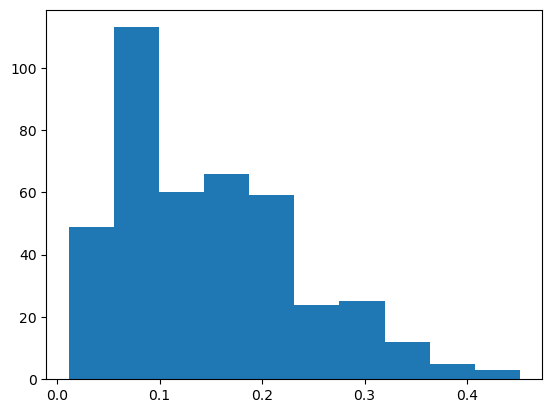

In [100]:
plt.hist(combo_subset['z_x'], bins=10)

In [101]:
combo_subset[combo_subset['z_x']<0.14]

,MCXC,OName,AName,Ah Am RAs Ed Em Es,RAdeg DEdeg,GLON GLAT,z_x,Cat,Sub-Cat,Scale,...,MSZ,E_MSZ,e_MSZ,RedMAPPer,ACT,SPT,ISE,AMIevi,O,Comment
2,J0003.8+0203,RXCJ0003.8+0203,A2700,0 3 50.6 + 2 3 48,0.961 2.063,99.610 -58.637,0.0924,NORAS/REFLEX,REFLEX,1.719,...,2.238774,0.282160,0.301448,RMJ000349.7+020359.3,,,-10,-1000.0,0,NaN
3,J0006.0-3443,RXCJ0006.0-3443,A2721,0 6 3.0 -34 43 27,1.513 -34.724,352.147 -77.668,0.1147,NORAS/REFLEX,REFLEX,2.080,...,4.001657,0.248869,0.226974,,,,-10,-1000.0,1,NaN
6,J0011.3-2851,RXCJ0011.3-2851,A2734,0 11 20.7 -28 51 18,2.836 -28.855,19.562 -80.986,0.0620,NORAS/REFLEX,REFLEX,1.195,...,2.606369,0.182667,0.188038,,,,-10,-1000.0,1,NaN
8,J0011.7+3225,RXC J0011.7+3225,A0007,0 11 44.4 +32 25 1,2.935 32.417,113.289 -29.710,0.1073,NORAS/REFLEX,NORAS,1.962,...,3.710075,0.264699,0.268743,RMJ001145.3+322456.4,,,-10,-100.0,1,NaN
9,J0013.6-1930,RXCJ0013.6-1930,A0013,0 13 38.3 -19 30 8,3.409 -19.502,72.276 -78.456,0.0940,NORAS/REFLEX,REFLEX,1.746,...,2.756623,0.233331,0.245311,,,,-10,-1000.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,J2350.8+0609,RXC J2350.8+0609,A2665,23 50 50.6 + 6 9 40,357.711 6.161,96.950 -53.626,0.0562,NORAS/REFLEX,NORAS,1.091,...,1.856202,0.210473,0.220559,RMJ235046.4+060842.8,,,-10,-1000.0,0,NaN
547,J2354.2-1024,RXCJ2354.2-1024,A2670,23 54 13.4 -10 24 46,358.556 -10.413,81.334 -68.530,0.0765,NORAS/REFLEX,REFLEX,1.450,...,2.761984,0.216913,0.225417,RMJ235413.7-102508.5,,,-10,-1000.0,1,NaN
548,J2355.6+1120,RXC J2355.6+1120,A2675,23 55 38.3 +11 20 36,358.909 11.343,101.718 -49.216,0.0726,NORAS/REFLEX,NORAS,1.382,...,2.399462,0.251411,0.234284,RMJ235542.6+112035.6,,,-10,-1000.0,1,NaN
549,J2357.0-3445,RXCJ2357.0-3445,A4059,23 57 2.3 -34 45 38,359.260 -34.761,356.359 -76.082,0.0475,NORAS/REFLEX,REFLEX,0.931,...,2.468719,0.163126,0.149009,,,,-10,-1000.0,1,NaN


In [102]:
combo_subset

,MCXC,OName,AName,Ah Am RAs Ed Em Es,RAdeg DEdeg,GLON GLAT,z_x,Cat,Sub-Cat,Scale,...,MSZ,E_MSZ,e_MSZ,RedMAPPer,ACT,SPT,ISE,AMIevi,O,Comment
0,J0001.9+1204,RXC J0001.9+1204,A2692,0 1 57.0 +12 4 23,0.488 12.073,104.308 -49.001,0.2033,NORAS/REFLEX,NORAS,3.342,...,4.107262,0.447796,0.505267,RMJ000158.5+120358.0,,,-10,-1000.0,0,NaN
1,J0003.1-0605,RXCJ0003.1-0605,A2697,0 3 11.8 - 6 5 10,0.799 -6.086,92.169 -66.033,0.2320,NORAS/REFLEX,REFLEX,3.698,...,5.957353,0.368165,0.369144,RMJ000311.6-060530.1,,,-10,-1000.0,1,NaN
2,J0003.8+0203,RXCJ0003.8+0203,A2700,0 3 50.6 + 2 3 48,0.961 2.063,99.610 -58.637,0.0924,NORAS/REFLEX,REFLEX,1.719,...,2.238774,0.282160,0.301448,RMJ000349.7+020359.3,,,-10,-1000.0,0,NaN
3,J0006.0-3443,RXCJ0006.0-3443,A2721,0 6 3.0 -34 43 27,1.513 -34.724,352.147 -77.668,0.1147,NORAS/REFLEX,REFLEX,2.080,...,4.001657,0.248869,0.226974,,,,-10,-1000.0,1,NaN
4,J0006.3+1052,RXC J0006.3+1052,ZwCl15,0 6 21.7 +10 52 4,1.591 10.868,105.386 -50.462,0.1698,NORAS/REFLEX,NORAS,2.895,...,3.853959,0.405330,0.437557,RMJ000620.3+105151.5,,,-10,-1000.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,J2351.6-2605,RXCJ2351.6-2605,A2667,23 51 40.7 -26 5 1,357.919 -26.084,34.017 -76.609,0.2264,NORAS/REFLEX,REFLEX,3.631,...,7.557539,0.365168,0.382711,,,,-10,-1000.0,1,NaN
547,J2354.2-1024,RXCJ2354.2-1024,A2670,23 54 13.4 -10 24 46,358.556 -10.413,81.334 -68.530,0.0765,NORAS/REFLEX,REFLEX,1.450,...,2.761984,0.216913,0.225417,RMJ235413.7-102508.5,,,-10,-1000.0,1,NaN
548,J2355.6+1120,RXC J2355.6+1120,A2675,23 55 38.3 +11 20 36,358.909 11.343,101.718 -49.216,0.0726,NORAS/REFLEX,NORAS,1.382,...,2.399462,0.251411,0.234284,RMJ235542.6+112035.6,,,-10,-1000.0,1,NaN
549,J2357.0-3445,RXCJ2357.0-3445,A4059,23 57 2.3 -34 45 38,359.260 -34.761,356.359 -76.082,0.0475,NORAS/REFLEX,REFLEX,0.931,...,2.468719,0.163126,0.149009,,,,-10,-1000.0,1,NaN
